<a href="https://colab.research.google.com/github/MonikSense/GLAUCOMA/blob/main/grayscaleLuminosityGreenChannelPCA3Tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Processed first 5 images using all three grayscale techniques.


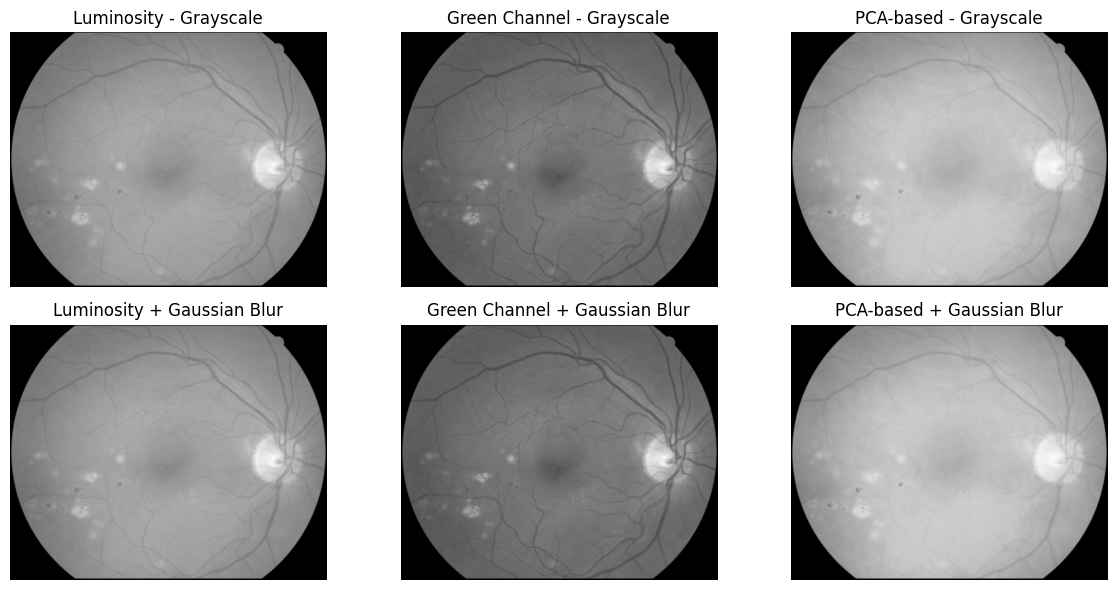

In [2]:
!pip install scikit-learn
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from google.colab import drive
drive.mount('/content/drive')
base_dir = "/content/drive/MyDrive/GlaucomaDataset/G1020"
folder = "Images"   # Change if needed

input_dir = os.path.join(base_dir, folder)
output_dir = os.path.join(base_dir, "blurred_first5")
os.makedirs(output_dir, exist_ok=True)
def grayscale_luminosity(img_bgr):
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

def grayscale_green_channel(img_bgr):
    return img_bgr[:, :, 1]

def grayscale_pca(img_bgr):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    pixels = img_rgb.reshape(-1, 3).astype(np.float32)

    pca = PCA(n_components=1)
    gray = pca.fit_transform(pixels)

    gray = gray.reshape(img_rgb.shape[0], img_rgb.shape[1])
    gray = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)

    return gray.astype(np.uint8)
kernel_size = (7, 7)
sigma = 0

count = 0

examples = {
    "Luminosity": None,
    "Green Channel": None,
    "PCA-based": None
}

for img_name in os.listdir(input_dir):
    if not img_name.lower().endswith((".jpg", ".jpeg", ".png")):
        continue

    img_path = os.path.join(input_dir, img_name)
    img = cv2.imread(img_path)

    if img is None:
        continue

    # --- Grayscale conversions ---
    gray_lum = grayscale_luminosity(img)
    gray_green = grayscale_green_channel(img)
    gray_pca = grayscale_pca(img)

    # --- Gaussian Blur ---
    blur_lum = cv2.GaussianBlur(gray_lum, kernel_size, sigma)
    blur_green = cv2.GaussianBlur(gray_green, kernel_size, sigma)
    blur_pca = cv2.GaussianBlur(gray_pca, kernel_size, sigma)

    # Save ONLY one method to disk (optional, keeps storage clean)
    cv2.imwrite(os.path.join(output_dir, img_name), blur_green)

    # Store one example for visualization
    if examples["Luminosity"] is None:
        examples["Luminosity"] = (gray_lum, blur_lum)
        examples["Green Channel"] = (gray_green, blur_green)
        examples["PCA-based"] = (gray_pca, blur_pca)

    count += 1
    if count == 5:
        break

print("✅ Processed first 5 images using all three grayscale techniques.")
plt.figure(figsize=(12,6))

methods = list(examples.keys())

for i, method in enumerate(methods):
    gray_img, blur_img = examples[method]

    plt.subplot(2, 3, i+1)
    plt.imshow(gray_img, cmap="gray")
    plt.title(f"{method} - Grayscale")
    plt.axis("off")

    plt.subplot(2, 3, i+4)
    plt.imshow(blur_img, cmap="gray")
    plt.title(f"{method} + Gaussian Blur")
    plt.axis("off")

plt.tight_layout()
plt.show()
